**Examples**

One Queue or Two

One server, one queue

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
def make_system(a, b):
    return System(a=a, b=b, duration=5*20)
arrival_time = 4
service_time = 2
a = 1 / arrival_time
b = 1 / service_time
system = make_system(a, b)

In [4]:
def first_update(x, t, system):
    # if there's a customer in service, check if they're done
    if x > 0:
        if flip(system.b):
            x -= 1
    # check for an arrival
    if flip(system.a):
        x += 1
    return x
first_update(1, 0, system)

1

In [5]:
def run_simulation(system, update_func):
    x = 0
    results = TimeSeries(name='Queue length')
    for t in linrange(0, system.duration):
        x = update_func(x, t, system)
        results[t+1] = x
    return results

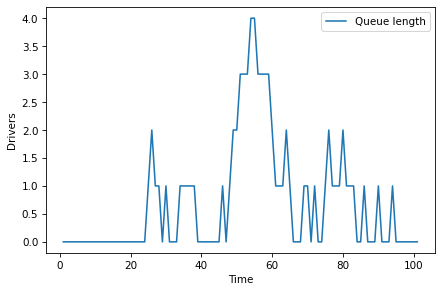

In [6]:
results = run_simulation(system, first_update)
results.plot()
decorate(xlabel='Time', ylabel='Drivers')

In [7]:
def compute_metrics(results, system):
    L = results.mean()
    W = L / system.a
    return L, W
compute_metrics(results, system)

(0.7029702970297029, 2.8118811881188117)

Parameter sweep

In [10]:
num_vals = 50
a_array = linspace(0.1*b, 0.8*b, num_vals)
a_array

array([0.05      , 0.05714286, 0.06428571, 0.07142857, 0.07857143,
       0.08571429, 0.09285714, 0.1       , 0.10714286, 0.11428571,
       0.12142857, 0.12857143, 0.13571429, 0.14285714, 0.15      ,
       0.15714286, 0.16428571, 0.17142857, 0.17857143, 0.18571429,
       0.19285714, 0.2       , 0.20714286, 0.21428571, 0.22142857,
       0.22857143, 0.23571429, 0.24285714, 0.25      , 0.25714286,
       0.26428571, 0.27142857, 0.27857143, 0.28571429, 0.29285714,
       0.3       , 0.30714286, 0.31428571, 0.32142857, 0.32857143,
       0.33571429, 0.34285714, 0.35      , 0.35714286, 0.36428571,
       0.37142857, 0.37857143, 0.38571429, 0.39285714, 0.4       ])

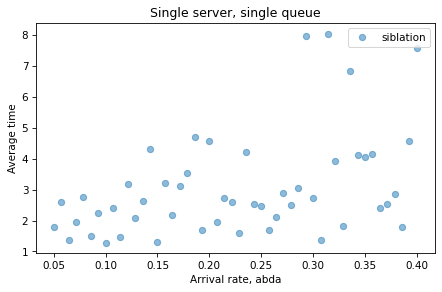

In [11]:
def sweep_a(a_array, b, update_func):
    sweep = SweepSeries()
    for a in a_array:
        system = make_system(a, b)
        results = run_simulation(system, update_func)
        L, W = compute_metrics(results, system)
        sweep[a] = W
    return sweep
sweep = sweep_a(a_array, b, first_update)
sweep.plot(style='o', alpha=0.5, label='siblation')

decorate(xlabel='Arrival rate, abda',
         ylabel='Average time',
         title='Single server, single queue')

In [12]:
W_avg = sweep.mean()
W_avg

3.057804895029091

Analysis

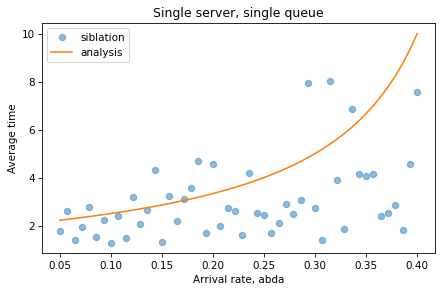

In [13]:
def plot_W(a_array, b):
    W_array = 1 / (b - a_array)
    W_series = make_series(a_array, W_array)
    W_series.plot(style='-', label='analysis')
sweep.plot(style='o', alpha=0.5, label='siblation')
plot_W(a_array, b)

decorate(xlabel='Arrival rate, abda',
         ylabel='Average time',
         title='Single server, single queue')

bltiple servers

(0.7029702970297029, 2.8118811881188117)

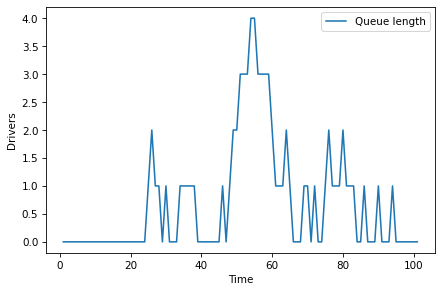

In [14]:
def second_update(x, t, system):
    # if both servers are busy, check whether the
    # second is complete
    if x > 1 and flip(system.b):
        x -= 1

    # check whether the first is complete
    if x > 0 and flip(system.b):
        x -= 1

    # check for an arrival
    if flip(system.a):
        x += 1

    return x
system = make_system(a, b)
run_simulation(system, second_update)
results.plot()
decorate(xlabel='Time', ylabel='Drivers')
compute_metrics(results, system)

In [15]:
a_array = linspace(0.1*b, 1.6*b, num_vals)
sweep = sweep_a(a_array, b, second_update)
W_avg = sweep.mean()
print('Average of averages = ', W_avg, 'minutes')

Average of averages =  2.252659016342182 minutes


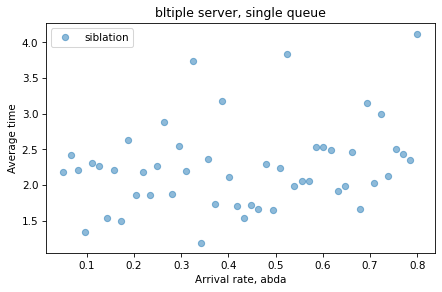

In [16]:
sweep.plot(style='o', alpha=0.5, label='siblation')
decorate(xlabel='Arrival rate, abda',
         ylabel='Average time',
         title='bltiple server, single queue')

bltiple queues

(0.7029702970297029, 2.8118811881188117)

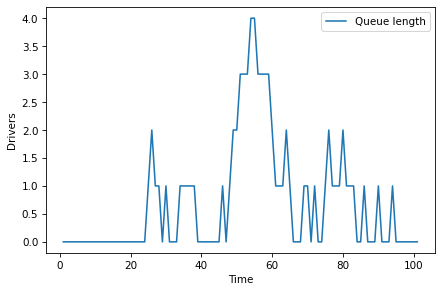

In [17]:
def third_update(x1, x2, t, system):
    # if the first servers is busy, check it it's done
    if x1 > 0 and flip(system.b):
        x1 -= 1

    # if the second queue is busy, check if it's done
    if x2 > 0 and flip(system.b):
        x2 -= 1

    # check for an arrival
    if flip(system.a):
        # join whichever queue is shorter
        if x1 < x2:
            x1 += 1
        else:
            x2 += 1

    return x1, x2
def run_simulation(system, update_func):
    x1, x2 = 0, 0
    results = TimeSeries()
    results[0] = x1 + x2

    for t in linrange(0, system.duration):
        x1, x2 = update_func(x1, x2, t, system)
        results[t+1] = x1 + x2

    return results
system = make_system(a, b)
run_simulation(system, third_update)
results.plot()
decorate(xlabel='Time', ylabel='Drivers')
compute_metrics(results, system)

In [18]:
sweep = sweep_a(a_array, b, third_update)
W_avg = sweep.mean()
print('Average of averages = ', W_avg, 'minutes')

Average of averages =  2.118635532362261 minutes


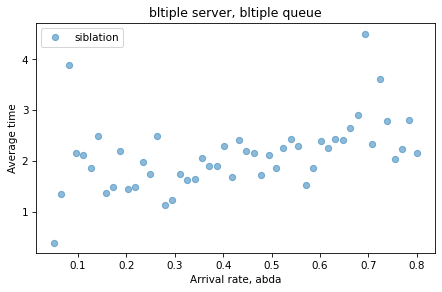

In [19]:
sweep.plot(style='o', alpha=0.5, label='siblation')
decorate(xlabel='Arrival rate, abda',
         ylabel='Average time',
         title='bltiple server, bltiple queue')